# Python Splash - Module Final - ex00

## 1. Setup Environment

### 1.1 Import PySentimiento
PySentimiento is a Python multilingual toolkit for Sentiment Analysis and Social NLP tasks. [Link](https://github.com/pysentimiento/pysentimiento)

It is installed using pip. Note that for any terminal command to work (i.e. bash commands), it needs to be precedeed by "!":


In [ ]:
!pip install pysentimiento

Once installed we can import it:

In [2]:
from pysentimiento import create_analyzer

and finally we can create an object which then will be used to analyze data:

In [ ]:
analyzer = create_analyzer(task="sentiment", lang="en")

TEST CASES:

In [4]:
print(analyzer.predict("What a time to be alive"))
print(analyzer.predict("This shit can't be real"))
print(analyzer.predict("You piss me off"))
print(analyzer.predict("jejeje I don't trust you"))

AnalyzerOutput(output=POS, probas={POS: 0.973, NEU: 0.025, NEG: 0.002})
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.055, POS: 0.008})
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.013, POS: 0.006})
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.004})


### 1.2 Obtain the data to be postprocessed
The data has been extracted from [kaggle](https://www.kaggle.com/datasets/kavita5/twitter-dataset-avengersendgame). Note that an account needs to be created to be able to download the .csv file.

The file is saved in google drive to be able to access it from colab.

![](/content/drive/MyDrive/Colab_Notebooks/ex00/img_gdrive.png)

Now can be imported as a file in the code:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import data into a list

One of the best ways to work with large ampunt of numerical data is to use pandas (for visualization of such data there are other modules suh as MatPlotLib).

### 2.1 Import pandas module

In [6]:
import pandas as pd
csv_file = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ex00/tweets.csv', encoding='ISO-8859-1')

### 2.2 Save the data of the csv file into a list:

The whole data set can be saved, but only the 'text' column is of value. Therefore, a string list is created with the information:

In [7]:
input_lst = []
for value in csv_file['text'].items():
    input_lst.append(value[1])

print('TEST CASES:\n')
print(input_lst[100])
print('-----')
print(input_lst[1000])
print('-----')
print(input_lst[2000])
print('-----')
print(input_lst[3000])
print('-----')
print(input_lst[4000])
print('-----')
print(input_lst[5000])

TEST CASES:

RT @MarvelStudios: The stars of #AvengersEndgame begin to arrive at the world premiere! https://t.co/grshoi9Dh5
-----
RT @ashchanchlani: After party #AvengersEndGame<U+2764><U+FE0F><U+2764><U+FE0F><U+2764><U+FE0F> https://t.co/gOBZXKkTdD
-----
RT @OriginalFunko: RT @ follow @OriginalFunko for a chance to WIN a @BoxLunchGifts exclusive #AvengersEndgame Iron Man Pop! #FunkoAvengers
-----
RT @MarkRuffalo: 100% of the proceeds from these limited edition shirts support our commitment to climate justice &amp; @100isnow. A big thanks
-----
RT @swiftiemarvel: LOOK AT HIM <U+0001F63B>
#WinterSoldier 
#AvengersEndgame https://t.co/saPwh9d7kP
-----
RT @ashchanchlani: #AvengersEndgame is EPIC EMOTIONAL AND THE BIGGEST BLOCKBUSER FROM MARVEL
You guys dont even know what you are in for
It


## 3. Postprocess the data
The data has now been imported to a list. The next step is to postprocess the data using PySentimiento.

### 3.1 Generate an output list

In [8]:
output_lst = []
for tweet in input_lst:
    output_lst.append(analyzer.predict(tweet))

print('TEST CASES:\n')
print(output_lst[100])
print('-----')
print(output_lst[1000])
print('-----')
print(output_lst[2000])
print('-----')
print(output_lst[3000])
print('-----')
print(output_lst[4000])
print('-----')
print(output_lst[5000])

TEST CASES:

AnalyzerOutput(output=POS, probas={POS: 0.807, NEU: 0.192, NEG: 0.001})
-----
AnalyzerOutput(output=NEU, probas={NEU: 0.937, POS: 0.060, NEG: 0.003})
-----
AnalyzerOutput(output=POS, probas={POS: 0.571, NEU: 0.428, NEG: 0.002})
-----
AnalyzerOutput(output=POS, probas={POS: 0.988, NEU: 0.011, NEG: 0.001})
-----
AnalyzerOutput(output=POS, probas={POS: 0.527, NEU: 0.471, NEG: 0.002})
-----
AnalyzerOutput(output=POS, probas={POS: 0.852, NEU: 0.103, NEG: 0.045})


### 3.2 Summarize all results:

In [18]:
total = len(output_lst)
pos = neg = neu = 0
for s in output_lst:
    if 'output=POS' in str(s):
        pos += 1
    if 'output=NEG' in str(s):
        neg += 1
    if 'output=NEU' in str(s):
        neu += 1

print(f'Total amount of tweets: {total}')
print(f'Total amount of positive: {pos} ({(pos * 100 / total):.2f}%)')
print(f'Total amount of neutral: {neu} ({(neu * 100 / total):.2f}%)')
print(f'Total amount of negative: {neg} ({(neg * 100 / total):.2f}%)')

Total amount of tweets: 15000
Total amount of positive: 7621 (50.81%)
Total amount of neutral: 7035 (46.90%)
Total amount of negative: 344 (2.29%)


## 4. BONUS:

Visualize results:

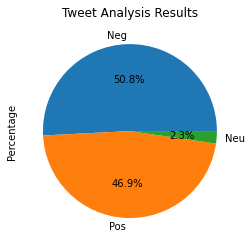

In [20]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Sentiment': ['Neg', 'Pos', 'Neu'],
    'Percentage': [(pos * 100 / total), (neu * 100 / total), (neg * 100 / total)]})

pie = df.plot(kind='pie', y='Percentage', labels=df['Sentiment'],
    autopct='%1.1f%%', legend=None)

pie.set_title('Tweet Analysis Results')

plt.show()